DOMAIN: ***Telecom***

• CONTEXT: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention.

### **Import Libraries**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Data Understanding & Exploration**

**A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.**

**B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**

In [ ]:
#Read the csv file
churn_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/ET/TelcomCustomer-Churn_1.csv')
churn_2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/ET/TelcomCustomer-Churn_2.csv')

In [ ]:
churn_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [ ]:
churn_2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_1.shape, churn_2.shape

((7043, 10), (7043, 12))

**C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [ ]:
df=pd.merge(churn_1,churn_2, on='customerID')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

In [ ]:
df_columns= set(df.columns)==set(churn_1.columns).union(set(churn_2.columns))
print('All the columns are incorporated in the merged DataFrame:',{df_columns})

All the columns are incorporated in the merged DataFrame: {True}


## **2. Data Cleaning & Analysis:**

**A. Impute missing/unexpected values in the DataFrame**

In [ ]:
df.isnull().sum() #checking for any missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Athough there seems no missing value, there are few empty strings in a particular column.If empty strings present and they are too many impute with mean , if less replace with zero.

In [ ]:
(df==' ').sum() # checking for empty strings


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here there are only 11 rows out of 7043 rows which have emty strings coming from totalcharges column, so they can be replaced with zero.

In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(' ', 0) # As the no. of empty string is less out of 7043 replacing with 0

In [ ]:
(df==' ').sum() # check again if empty string is present


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'].unique()  #returns the unique values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**B. Make sure all the variables with continuous values are of ‘Float’ type.**

In [ ]:
df.info() # checking the dataframe datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insights: The totalcharges in the dataframe looks a continuous value, and that is seen using the .unique(), and so they have to be converted to float type before performing the model building.

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype(float) # chaning the totalcharge from object to float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df=df.drop(labels=['customerID'], axis=1) # customerID has no impact with the dataset so drop the column.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking for categorical column if selected right
categorical_columns=df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


**C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.**

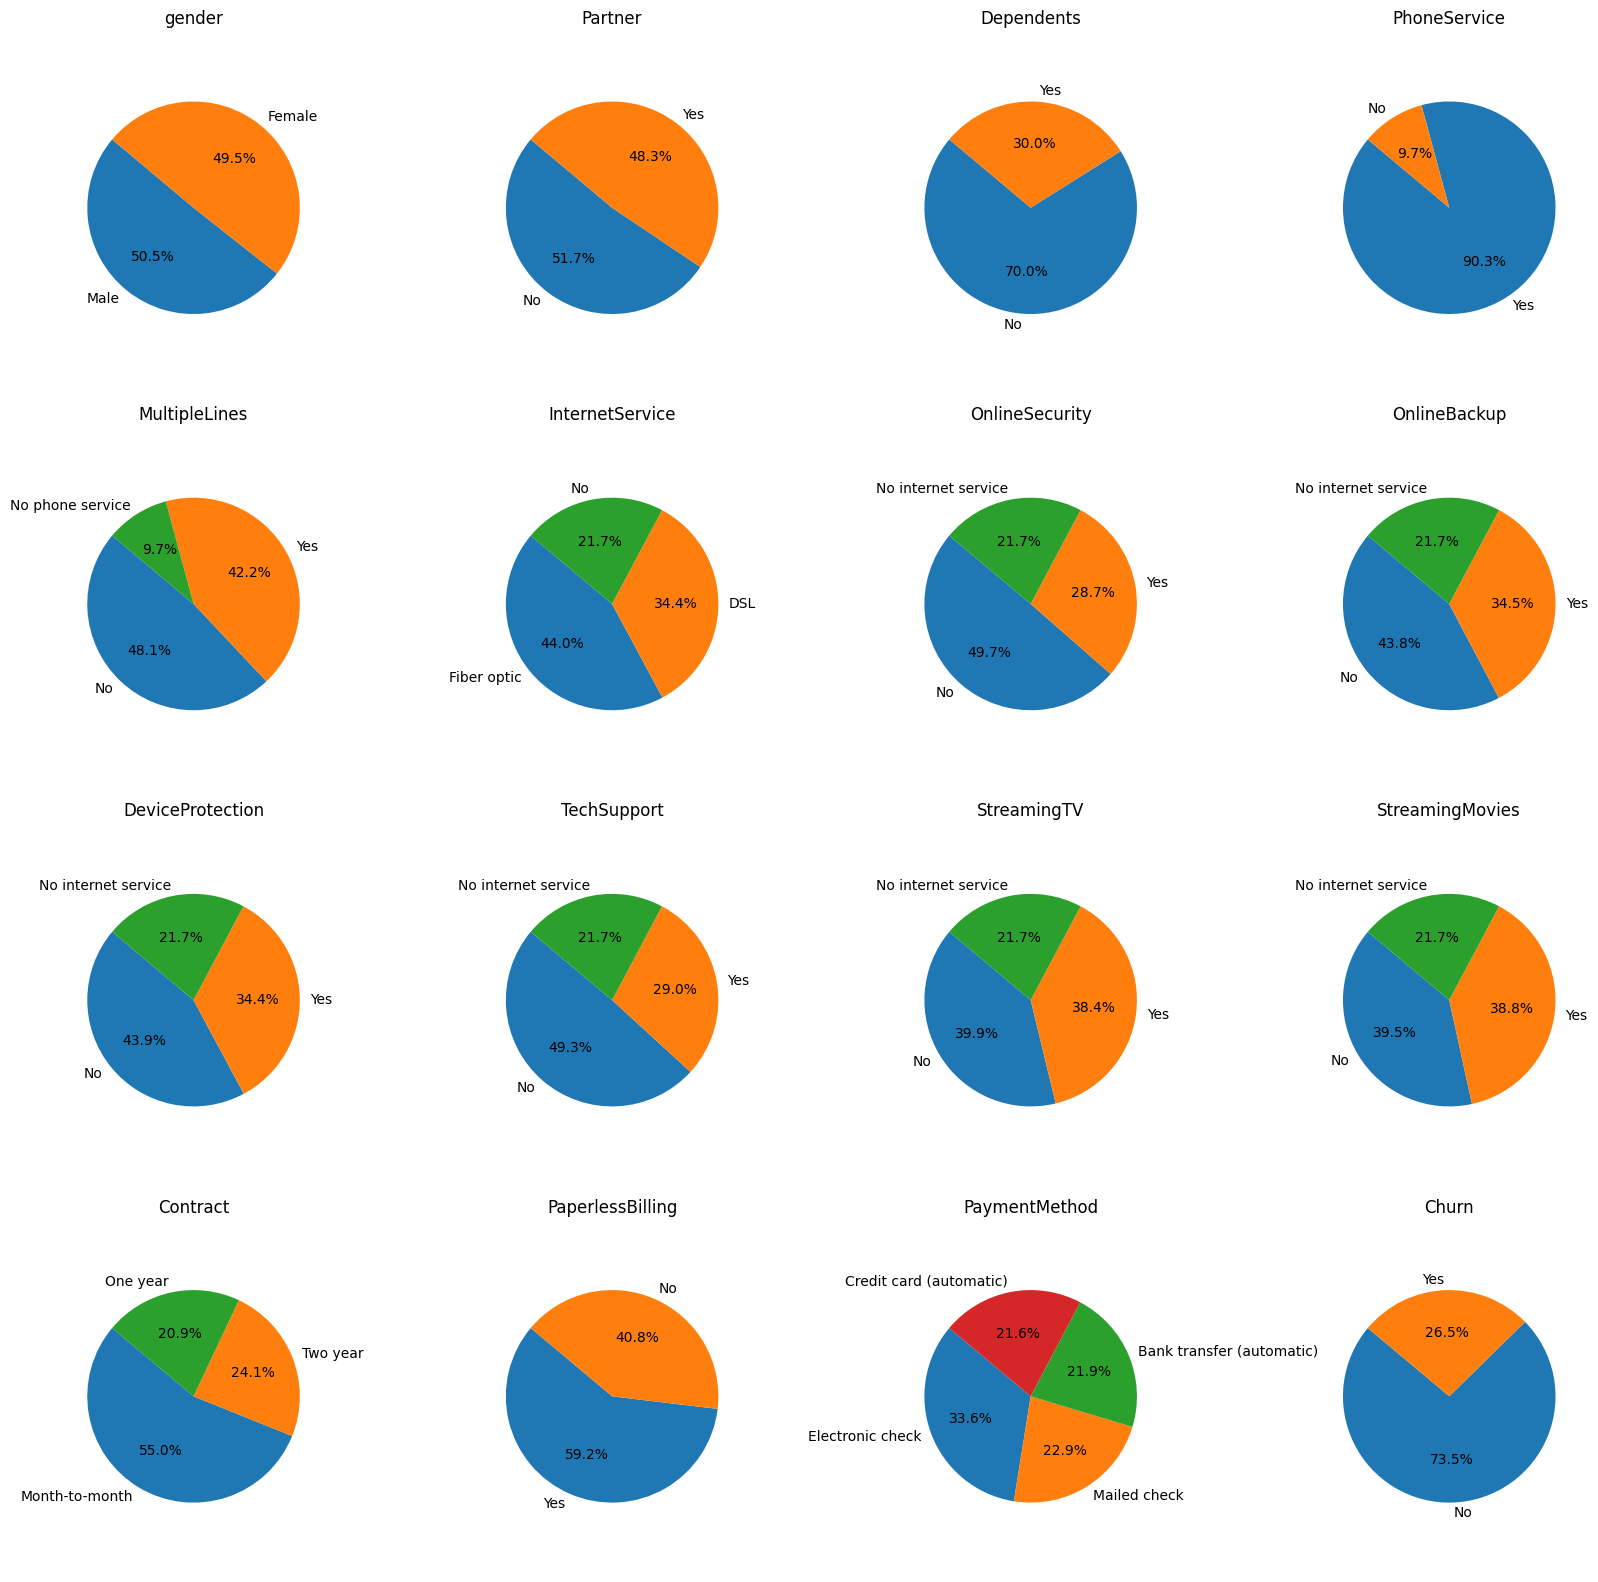

In [ ]:
#define a function to accept the churn dataframe and select the categorical features.
def plot_categorical_pie_chart(df):
  #Identifying the categorical columns
   categorical_columns=df.select_dtypes(include=['object','category']).columns

#getting the no.of rows needed for 4plots per row
   cols=len(categorical_columns)
   rows=(cols+3)//4
   fig,axes=plt.subplots(rows,4,figsize=(16, rows*4))
   axes=axes.flatten()
  #Now we have to loop through each selected categorical column to create pie chart
   for i, column in enumerate(categorical_columns):
      #checking value counts and percentage distribution for pie chart
       value_counts=df[column].value_counts()
  # plot the pie chart
       axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
       axes[i].set_title(column)
       axes[i].axis('equal')

   plt.tight_layout()
   plt.show()
 #calling the function to plot pie chart
plot_categorical_pie_chart(df)

**D. Share insights for Q2.c.**

Gender: The gender between Male and female is almost same, indicating there is no significant gender bias among the customers base.

Partner: A slight higher percentage is seen on  number of customers who dont have partners. For this retention strategies have to be considered to check for the differing needs of ones with partners and single customers.

Dependents: A majority number of customers dont have dependents. This could influence the services and products marketed from the telcom company.

PhoneService: Majority of the cusstomers have phone service, suggesting its core service importance.

Mutliplelines: Nearly half of the customers although they have phone service, they dont have multiple lines and a significant number of sutomers dont have phone service at all.This someway indicates that multiple lines are more at upsell to the exisiting phone service customers.

InternetService: Fibreoptics connections seems to be used at higher number, followed by DSL.  And so, considering extending fibreoptic service for phone connections would benefit the company.

Onlinesecurity, OnlineBackup, DeviceProtection: A significant higher percenatge dont have online security, backup and protection. To increase this number on a positive note marketing efforts have to be done stating the importance of having these services, so that the sales and adoption of service will increase.

TechSupport: Nearly half the customers dont have techsupport, suggesting a growth in this area can be initiated more.

StreamingMovies, Streaming TV: Among the Internets ervice, there is almost a equal split between the usage of services. So the telcom company can promote more ways to attract customers to use there services.

Contract Type: Most customers prefer month on month contract which correlates with the high churn rate. So company has to pull up strategy so as to increase the contract.

Paper billing: Majority prefer paperless billing, indicating the cost effective/saving service implemented by the company.

PaymentMethod:Among the payment Method electronic means of payment is most used. This has to be cross checked with the churn for their correlation.

Churn: About more than 3/4th of cutomers have churned. So understanding the customers needs will help in developing trageted retention strategy.



**E. Encode all the appropriate Categorical features with the best suitable approach.**

In [ ]:
replacestructure={'gender':{"Male":0, "Female":1},
                  'Partner':{"Yes":1, "No":0},
                  'Dependents':{"Yes":1, "No":0},
                  'PhoneService':{"Yes":1, "No":0},
                  'MultipleLines':{"No phone service":0, "No":1, "Yes":2},
                  'InternetService':{"No":0, "DSL":1, "Fiber optic":2},
                  'OnlineSecurity':{"No internet service":0, "No":1, "Yes":2},
                  'OnlineBackup':{"No internet service":0, "No":1, "Yes":2},
                  'DeviceProtection':{"No internet service":0, "No":1, "Yes":2},
                  'TechSupport':{"No internet service":0, "No":1, "Yes":2},
                  'StreamingTV':{"No internet service":0, "No":1, "Yes":2},
                  'StreamingMovies':{"No internet service":0, "No":1, "Yes":2},
                  'Contract':{"Month-to-month":0, "One year":1, "Two year":2},
                  'PaperlessBilling':{"No":0, "Yes":1},
                  'Churn':{"Yes":1, "No":0}}
#label encoding
df=df.replace(replacestructure)

#one hot encoding
df=pd.get_dummies(df, columns=['PaymentMethod'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,1,2,...,1,0,1,29.85,29.85,0,False,False,True,False
1,0,0,0,0,34,1,1,1,2,1,...,1,1,0,56.95,1889.50,0,False,False,False,True
2,0,0,0,0,2,1,1,1,2,2,...,1,0,1,53.85,108.15,1,False,False,False,True
3,0,0,0,0,45,0,0,1,2,1,...,1,1,0,42.30,1840.75,0,True,False,False,False
4,1,0,0,0,2,1,1,2,1,1,...,1,0,1,70.70,151.65,1,False,False,True,False


**F. Split the data into 80% train and 20% test.**

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the dataset into training and testing
X=df.drop('Churn', axis=1) # independent variable
y=df.pop('Churn') # target variable
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

**G. Normalize/Standardize the data with the best suitable approach.**

In [ ]:
#standardise the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## **3. Model building and performance improvement :**

**A. Train a model using Decision tree and check the performance of the model on train and test data.**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini', random_state=42)
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

**Scoring Decision tree**

In [ ]:
print(dtree.score(X_train_scaled, y_train))
print(dtree.score(X_test_scaled, y_test))

0.9985800496982605
0.7345635202271115


**Reducing Overfitting-Regularization**

In [ ]:
dtreeR=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtreeR.fit(X_train_scaled, y_train)
y_predict=dtreeR.predict(X_train_scaled)
y_predict1=dtreeR.predict(X_test_scaled)
print("score train:", dtreeR.score(X_train_scaled, y_train), '\n\n')
print("Accuracy train:", accuracy_score(y_train, y_predict), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict), '\n\n')
print("score test:", dtreeR.score(X_test_scaled, y_test), '\n\n')
print("Accuracy test:", accuracy_score(y_test, y_predict1), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict1), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict1))

score train: 0.7889598864039759 


Accuracy train: 0.7889598864039759 


Classification train: 

               precision    recall  f1-score   support

           0       0.80      0.94      0.87      4138
           1       0.70      0.36      0.48      1496

    accuracy                           0.79      5634
   macro avg       0.75      0.65      0.67      5634
weighted avg       0.78      0.79      0.76      5634
 


Confusion Matrix train: 

 [[3899  239]
 [ 950  546]] 


score test: 0.7955997161107168 


Accuracy test: 0.7955997161107168 


Classification test: 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.71      0.39      0.50       373

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.78      0.80      0.77      1409
 


Confusion Matrix test: 

 [[975  61]
 [227 146]]


**B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b**

In [ ]:
from sklearn.model_selection import GridSearchCV # gridsearchCV is used for hyperparmeter tuning for model improvement.

In [ ]:
#defining the parameter grid for GridSearchCV
param_grid={'max_depth': [3,5,7,10, None], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}

#Initializing Decision tree model
dtreegrid=DecisionTreeClassifier(random_state=42)

#performing grid serach with cross validation
grid_search=GridSearchCV(estimator=dtreegrid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
#obtaining the best parameters
best_params=grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
#train the best model
best_dtree=grid_search.best_estimator_

y_predict_best=best_dtree.predict(X_train_scaled)
y_predict_best1=best_dtree.predict(X_test_scaled)
print("score train:", best_dtree.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_best), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_best), '\n\n')
print("score test:", best_dtree.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict_best1), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict_best1))

score train: 0.7988995385161519 


Classification train: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4138
           1       0.62      0.62      0.62      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.74      0.74      5634
weighted avg       0.80      0.80      0.80      5634
 


Confusion Matrix train: 

 [[3578  560]
 [ 573  923]] 


score test: 0.8026969481902059 


Classification test: 

               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1036
           1       0.62      0.65      0.64       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.80      0.80      1409
 


Confusion Matrix test: 

 [[889 147]
 [131 242]]


Insights on the basic difference in decsion tree model before and after Tunning to decrease the overfitting and increase the overall performance based on various metrics.

**Training performance before and After Tuning:**
Accuracy: We can see that there is improvement in accuracy percentage from 0.7889 to 0.7989.

Class 0 metrics(Non-Churn: customers likely to stay): The precision has increased from 0.80 to .86 and recall rate is decreased from 0.94 to 0.86. F1 score has slightly decreased.

Class 1 (Churn: customers likely to leave): The precision has decreased from 0.70 to 0.62 and recall rate is increased from 0.36 to 0.62. F1 score has significantly increased.

Confusion matrix: The no. of true positive on class 0 has decreased (3899 to 3578) and class 1 true negative increased (546 to 932), indicating a good balance in class predictions.


**Testing Performance befor and After tune:**

Accuracy: We can see that there is improvement in accuracy percentage from 0.7956 to 0.8027.

Class 0 metrics(Non-Churn: customers likely to stay): The precision has increased from 0.81 to .87 and recall rate  and F1 score is stable 0.86.

Class 1 (Churn: customers likely to leave): The precision has decreased from 0.71 to 0.62 and recall rate is increased from 0.39 to 0.65. F1 score has significantly increased to 0.64.

Confusion matrix: The no. of true positive on class 0 has decreased (975 to 889) indiactes that the model is predicting non-churn correctly and class 1 true negative increased (146 to 242) model is telling the no. of customers churing are being correctly identified (positive outcome), indicating a good balance in class predictions.

Overall: An increase in churning out will help the company to promote better targeted retention efforts on people who are likely to leave.

**C. Train a model using Random forest and check the performance of the model on train and test data.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#initialize the random forest model
rf=RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)
y_predict_rf=rf.predict(X_train_scaled)
y_predict1_rf=rf.predict(X_test_scaled)
print("score train:", rf.score(X_train_scaled, y_train), '\n\n')
print("Accuracy train:", accuracy_score(y_train, y_predict_rf), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_rf), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_rf), '\n\n')
print("score test:", rf.score(X_test_scaled, y_test), '\n\n')
print("Accuracy test:", accuracy_score(y_test, y_predict1_rf), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict1_rf), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict1_rf))

score train: 0.997515086971956 


Accuracy train: 0.997515086971956 


Classification train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634
 


Confusion Matrix train: 

 [[4131    7]
 [   7 1489]] 


score test: 0.7877927608232789 


Accuracy test: 0.7877927608232789 


Classification test: 

               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409
 


Confusion Matrix test: 

 [[938  98]
 [201 172]]


**D.Use grid search and improve the performance of the Random tree model,**
**check the performance of the model on train and test data , provide the** **differences observed in performance in Q3.c and Q3.d**

In [ ]:
#defining the parameter grid for GridSearchCV
param_grid={'n_estimators':[50, 100,150,200,300], 'max_depth': [None, 10, 20, 30], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}

#Initializing Randomforest tree model
rfgrid=RandomForestClassifier(random_state=42)

#performing grid search with cross validation
grid_search=GridSearchCV(estimator=rfgrid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
#obtaining the best parameters
best_params=grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
best_score=grid_search.best_score_
print(best_score)

0.8049337983706882


In [ ]:
#train the best model
best_rf=grid_search.best_estimator_

y_predict_bestrf=best_rf.predict(X_train_scaled)
y_predict_bestrf1=best_rf.predict(X_test_scaled)
print("score train:", best_rf.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_bestrf), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_bestrf), '\n\n')
print("score test:", best_rf.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict_bestrf1), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict_bestrf1))

score train: 0.8693645722399717 


Classification train: 

               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4138
           1       0.83      0.64      0.72      1496

    accuracy                           0.87      5634
   macro avg       0.86      0.80      0.82      5634
weighted avg       0.87      0.87      0.86      5634
 


Confusion Matrix train: 

 [[3944  194]
 [ 542  954]] 


score test: 0.8133427963094393 


Classification test: 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409
 


Confusion Matrix test: 

 [[954  82]
 [181 192]]


**Observed Difference before and After tuning-Random Forest:**

Training performance:

Accuracy: decrease from 0.99 to 0.869 after tuning, inidcating overfitting before tuning on training data.

Precision, Recall and F1-score: All the metrics have decreased after tuning.

Confusion matrix: There is an increase in false negative and false positive after tuning.

Testing performance:

Accuracy: decrease from 0.78 to 0.813 after tuning.

Precision: Increased in both classes, Recall and F1: Increased on both, but more on class 1 (churn).

Confusion matrix: There is an decrease in false negative and false positive after tuning.

Overall: After tuning the model performance was decreased, indiacting the model was adjusted over the overfitting on training data performance. Howevere on test data there is increase in performance metrics suggesting better generalization on unseen data.

**E. Train a model using Adaboost and check the performance of the model on train and test data**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#initialize the Adaboost model
ada=AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train_scaled, y_train)
y_predict_ada=ada.predict(X_train_scaled)
y_predict1_ada=ada.predict(X_test_scaled)
print("score train:", ada.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_ada), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_ada), '\n\n')
print("score test:", ada.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict1_ada), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict1_ada))

score train: 0.8004969826056088 


Classification train: 

               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4138
           1       0.68      0.47      0.55      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.69      0.71      5634
weighted avg       0.79      0.80      0.79      5634
 


Confusion Matrix train: 

 [[3810  328]
 [ 796  700]] 


score test: 0.8048261178140526 


Classification test: 

               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409
 


Confusion Matrix test: 

 [[951  85]
 [190 183]]


**F. Use grid search and improve the performance of the Adaboost model,check the performance of the model on train and test data, provide the differences observed in performance in Q3.e and Q3.f**

In [ ]:
#defining the parameter grid for GridSearchCV
param_grid={'n_estimators':[50, 100,200], 'learning_rate':[0.01,0.1,1,1.5,2]}

#Initializing Adaboost model
adagrid=AdaBoostClassifier(random_state=42)

#performing grid serach with cross validation
grid_search=GridSearchCV(estimator=adagrid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
#obtaining the best parameters
best_params=grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 1, 'n_estimators': 50}


In [ ]:
#train the best model
best_ada=grid_search.best_estimator_

y_predict_bestada=best_ada.predict(X_train_scaled)
y_predict_bestada1=best_ada.predict(X_test_scaled)
print("score train:", best_ada.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_bestada), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_bestada), '\n\n')
print("score test:", best_ada.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict_bestada1), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict_bestada1))

score train: 0.8074192403265885 


Classification train: 

               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.67      0.54      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634
 


Confusion Matrix train: 

 [[3745  393]
 [ 692  804]] 


score test: 0.8140525195173882 


Classification test: 

               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409
 


Confusion Matrix test: 

 [[933 103]
 [159 214]]


**AdaBoost Overall performance Before and After Tuning:**

Accurcay:
Training: Adaboost didnt have overfitting of training data and the accuracy before and after tune performed good. Increase is seen after tuning ie., 0.8005 to 0.8074
Testing: Increase on testing data from 0.8048 to 0.8141. Adaboost tuned to bes the best model having highest accuracy.

Precsion, Recall and F1-score:

Class 0(non-churn): precsion and recall remained stable, with minor improvedment on testing precsion and decrease in recall on testing.

Class 1 (churn): Notable improvement is seen on recall  training (.47 to 0.54) and testing (0.49 to 0.57). F1 training (.55 to 0.60) and testing (0.57 to 0.62)

Confusion Matrix: Decrease in TN and Increase in FP on class 0 after tuning. This indicates a conservative approach towards classifying the class 0.

Class 1: Decrease in FN and increase in TP, indicating better detection on churn.

Overall: Adaboost seems to have overall improved its performance on accuracy after tuning and detecting class 1 (churn) instances.

**G. Train a model using GradientBoost and check the performance of the model on train and test data**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Initialize the GradientBoost model
GB=GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
GB.fit(X_train_scaled, y_train)
y_predict_GB=GB.predict(X_train_scaled)
y_predict1_GB=GB.predict(X_test_scaled)
print("score train:", GB.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_GB), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_GB), '\n\n')
print("score test:", GB.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict1_GB), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict1_GB))

score train: 0.8138090166844161 


Classification train: 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.70      0.52      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634
 


Confusion Matrix train: 

 [[3801  337]
 [ 712  784]] 


score test: 0.8147622427253371 


Classification test: 

               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409
 


Confusion Matrix test: 

 [[949  87]
 [174 199]]


**H. Use grid search and improve the performance of the GradientBoostmodel, check the performance of the model on train and test data, provide the differences observed in performance in Q3.g and Q3.h**

In [ ]:
#defining the parameter grid for GridSearchCV
param_grid={'n_estimators':[50, 100,150], 'learning_rate':[0.01,0.1,1], 'max_depth': [3,5,7], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4] }

#Initializing Adaboost model
GBgrid=GradientBoostingClassifier(random_state=42)

#performing grid serach with cross validation
grid_search=GridSearchCV(estimator=GBgrid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
#obtaining the best parameters
best_params=grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
#train the best model
best_GB=grid_search.best_estimator_

y_predict_bestGB=best_GB.predict(X_train_scaled)
y_predict_bestGB1=best_GB.predict(X_test_scaled)
print("score train:", best_GB.score(X_train_scaled, y_train), '\n\n')
print("Classification train:",  '\n\n', classification_report(y_train, y_predict_bestGB), '\n\n')
print("Confusion Matrix train:",  '\n\n', confusion_matrix(y_train, y_predict_bestGB), '\n\n')
print("score test:", best_GB.score(X_test_scaled, y_test), '\n\n')
print("Classification test:",'\n\n', classification_report(y_test, y_predict_bestGB1), '\n\n')
print("Confusion Matrix test:",'\n\n', confusion_matrix(y_test, y_predict_bestGB1))

score train: 0.8122115725949591 


Classification train: 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.70      0.52      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634
 


Confusion Matrix train: 

 [[3798  340]
 [ 718  778]] 


score test: 0.8112136266855926 


Classification test: 

               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409
 


Confusion Matrix test: 

 [[947  89]
 [177 196]]


**Gradient boost overall perfprmance before and after tuning:**

Accuracy: No siginificant change.
Before tuning:0.8148
After:0.8112
Difference:-0.0036

Precision non churn: No siginificant change.
Before tuning:0.85
After:0.84
Difference:-0.01

Recall non churn: No siginificant change.
Before tuning:0.92
After:0.91
Difference:-0.01

F1 non churn: no change.

Precision churn: No siginificant change.
Before tuning:0.70
After:0.69
Difference:-0.01

Recall and F1 churn: siginificant change.

Overall observed difference are so minimal, with ver slight decrease in precision, recall on class 0 and only precision on class 1. All these suggest that the tuning has no much impact on the model performance.




**I. Provide detailed analysis of the below steps**

(1) Compare the performance of each model in train stage and test stage

In [ ]:
from sklearn.metrics import precision_score, recall_score
# before and Ater tuning
#Decision tree_test

dec_test=accuracy_score(y_test, y_predict1)
decp_test=precision_score(y_test, y_predict1)
decr_test=recall_score(y_test, y_predict1)

#grid_decision tree_test
dec_test1= accuracy_score(y_test, y_predict_best1)
decp_test1= precision_score(y_test, y_predict_best1)
decr_test1= recall_score(y_test, y_predict_best1)


#Random Forest_test
rf_test=accuracy_score(y_test, y_predict1_rf)
rfp_test=precision_score(y_test, y_predict1_rf)
rfr_test=recall_score(y_test, y_predict1_rf)

#grid_Random Forest_test
rf_test1= accuracy_score(y_test, y_predict_bestrf1)
rfp_test1= precision_score(y_test, y_predict_bestrf1)
rfr_test1= recall_score(y_test, y_predict_bestrf1)

# AdaBoost_test
ada_test=accuracy_score(y_test, y_predict1_ada)
adap_test=precision_score(y_test, y_predict1_ada)
adar_test=recall_score(y_test, y_predict1_ada)


# grid_AdaBoost_test
ada_test1= accuracy_score(y_test, y_predict_bestada1)
adap_test1= precision_score(y_test, y_predict_bestada1)
adar_test1= recall_score(y_test, y_predict_bestada1)


#Gradient Boost_test
GB_test=accuracy_score(y_test, y_predict1_GB)
GBp_test=precision_score(y_test, y_predict1_GB)
GBr_test=recall_score(y_test, y_predict1_GB)



#grid_Gradient Boost_test

GB_test1= accuracy_score(y_test, y_predict_bestGB1)
GBp_test1= precision_score(y_test, y_predict_bestGB1)
GBr_test1= recall_score(y_test, y_predict_bestGB1)

#Test_Performance_before tuned
r1=pd.DataFrame({'Method':['Decision Tree'], 'Accuracy':[dec_test], 'Precision':[decp_test], 'Recall':[decr_test]})
r2=pd.DataFrame({'Method':['Random Forest'], 'Accuracy':[rf_test], 'Precision':[rfp_test], 'Recall':[rfr_test]})
r3=pd.DataFrame({'Method': ['Ada Boost'], 'Accuracy':[ada_test], 'Precision':[adap_test], 'Recall':[adar_test]})
r4=pd.DataFrame({'Method':  ['GradientBoost'], 'Accuracy':[GB_test], 'Precision':[GBp_test], 'Recall':[GBr_test]})
#Result_test_before_tuned
Resulttest=pd.concat([r1,r2,r3,r4])
Resulttest=Resulttest[['Method', 'Accuracy', 'Precision', 'Recall']]

#Test_performance_tuned
r5=pd.DataFrame({'Method':['Decision Tree'], 'Accuracy':[dec_test1], 'Precision':[decp_test1], 'Recall':[decr_test1]})
r6=pd.DataFrame({'Method':['Random Forest'], 'Accuracy':[rf_test1], 'Precision':[rfp_test1], 'Recall':[rfr_test1]})
r7=pd.DataFrame({'Method': ['Ada Boost'], 'Accuracy':[ada_test1], 'Precision':[adap_test1], 'Recall':[adar_test1]})
r8=pd.DataFrame({'Method':  ['GradientBoost'], 'Accuracy':[GB_test1], 'Precision':[GBp_test1], 'Recall':[GBr_test1]})

#Result_test_tuned
Resulttest1=pd.concat([r5,r6,r7,r8])
Resulttest1=Resulttest1[['Method', 'Accuracy', 'Precision', 'Recall']]

#print before Tune and after tune test data model performance
print('Test:', '\n\n',  Resulttest, '\n\n')
print('Test tuned:', '\n\n', Resulttest1)

Test: 

           Method  Accuracy  Precision    Recall
0  Decision Tree  0.795600   0.705314  0.391421
0  Random Forest  0.787793   0.637037  0.461126
0      Ada Boost  0.804826   0.682836  0.490617
0  GradientBoost  0.814762   0.695804  0.533512 


Test tuned: 

           Method  Accuracy  Precision    Recall
0  Decision Tree  0.802697   0.622108  0.648794
0  Random Forest  0.813343   0.700730  0.514745
0      Ada Boost  0.814053   0.675079  0.573727
0  GradientBoost  0.811214   0.687719  0.525469


**(2) Provide your observation on which model performed the best**

Based on the above observation before and after tuning for testing data, if the model performance on testing data is chosen based on **Accuracy**: Although all the models performed equally good with testing data after tuning comparative to the before tuned testing.Before tuning training data which mostly had overfitting. Among them the **AdaBoost** on tuning has a best accuracy (0.8141) ,followed by the others.

On the basis of precision: Random forest with (0.7007) has the high precision rate on tuned testing data.

Recall: Decision tree with 0.649 has high positive instances, followed by Adaboost (0.5737) on tuned testing data.

**(3) Provide your reasoning on why the model performed best**

**AdaBoost**: ***It has the highest accuracy, which is crucial metrics for overall model performance. Also, though they dont have the highest precision or recall rate individually, it has maintained a good balance leading to overall strong performance. We can also see that the testing accuracy before and after tune is almost the same which indicates no overfit of data.***

Random Forest: It has the highest precision rate indicating the minimization of false positive. Also next to adaboost it also has high accuracy. Here the tuned testing data precision performed well than the before testing.

Decision tree: has more recall rate indicating it might identify more true positive. However their accuracy and precision being lower indicates more false positive and therby lowering overall performance.

GradientBoost:It shows good balance on precision and recall, however there is less comparative to Adaboost and RandomForest. Also there is no significant changes observed.

**(4) Provide your final conclusion on your observation**

Adaboost tuned emerges as the best model based on accuracy on testing data. It has a good balance between Accuracy, precsion, recall making it more reliable and robust model for classification task. Also, the train and the test data performance is almost same indicating good generalization capabilities and minimal overfitting of data.